In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define the strike price
strike = 3000

# Create an array of spot prices
spot = np.arange(2750.0, 3250.0, 10.0)

# Calculate funding rates for long positions
funding_long = np.maximum(strike - spot, 0)

# Calculate funding rates for short positions
funding_short = np.maximum(spot - strike, 0)

spot_strike_funding = pd.DataFrame(
    {
        "spot_price": spot,  # Spot prices
        "strike_price": strike,  # Strike price (constant)
        "funding_rate_long": funding_long,  # Funding rates for long positions
        "funding_rate_short": funding_short,  # Funding rates for short positions
    }
)

print(spot_strike_funding)

    spot_price  strike_price  funding_rate_long  funding_rate_short
0       2750.0          3000              250.0                 0.0
1       2760.0          3000              240.0                 0.0
2       2770.0          3000              230.0                 0.0
3       2780.0          3000              220.0                 0.0
4       2790.0          3000              210.0                 0.0
5       2800.0          3000              200.0                 0.0
6       2810.0          3000              190.0                 0.0
7       2820.0          3000              180.0                 0.0
8       2830.0          3000              170.0                 0.0
9       2840.0          3000              160.0                 0.0
10      2850.0          3000              150.0                 0.0
11      2860.0          3000              140.0                 0.0
12      2870.0          3000              130.0                 0.0
13      2880.0          3000              120.0 

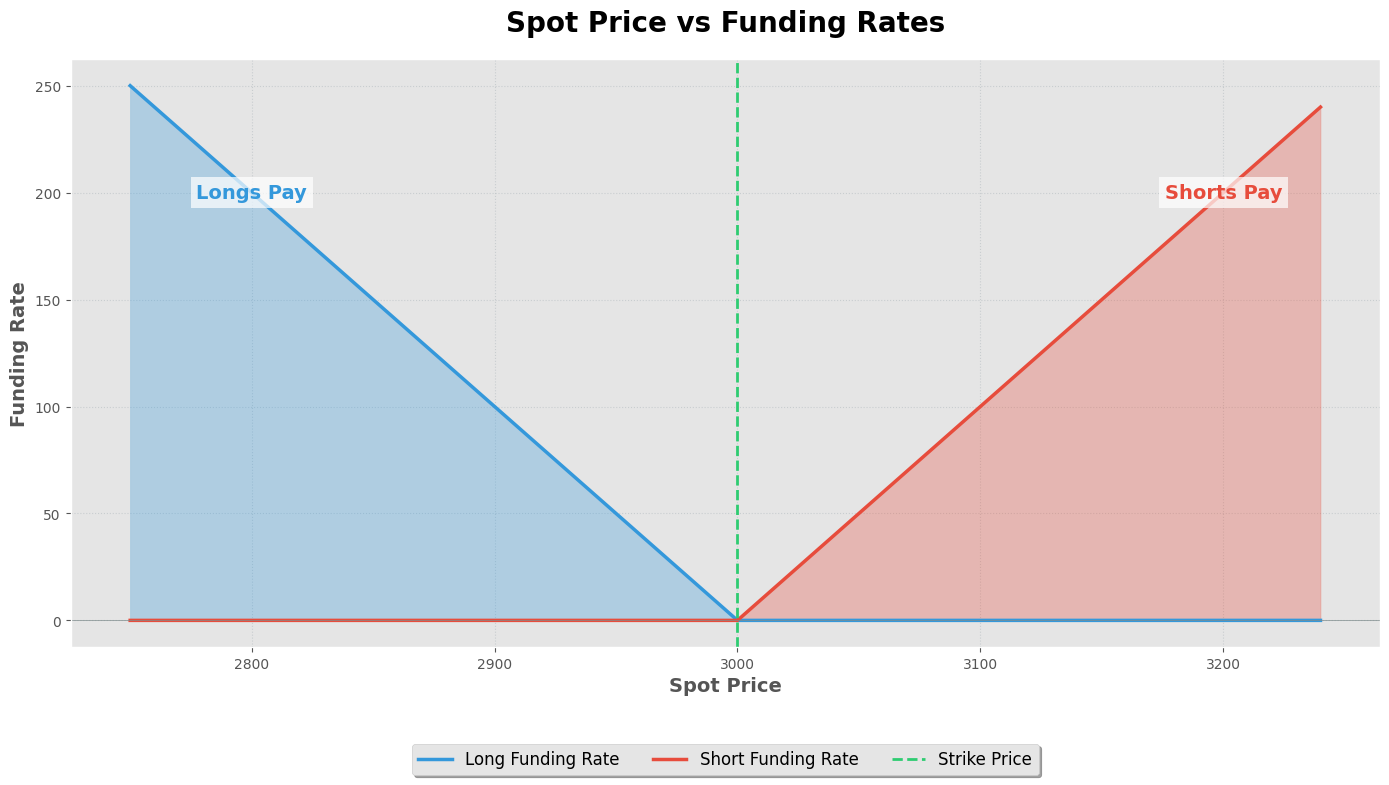

In [3]:
# Set the style
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data with enhanced styling
ax.plot(spot_strike_funding["spot_price"], spot_strike_funding["funding_rate_long"], 
        label="Long Funding Rate", color='#3498db', linewidth=2.5)
ax.plot(spot_strike_funding["spot_price"], spot_strike_funding["funding_rate_short"], 
        label="Short Funding Rate", color='#e74c3c', linewidth=2.5)

# Add strike price line
ax.axvline(x=strike, color='#2ecc71', linestyle='--', linewidth=2, label="Strike Price")

# Add horizontal line at y=0
ax.axhline(y=0, color='#7f8c8d', linestyle='-', linewidth=0.5)

# Shade the areas
ax.fill_between(spot_strike_funding["spot_price"], 0, spot_strike_funding["funding_rate_long"], 
                alpha=0.3, color='#3498db')
ax.fill_between(spot_strike_funding["spot_price"], 0, spot_strike_funding["funding_rate_short"], 
                alpha=0.3, color='#e74c3c')

# Add quadrant labels with enhanced styling
max_funding = max(spot_strike_funding["funding_rate_long"].max(), spot_strike_funding["funding_rate_short"].max())
ax.text(2800, max_funding * 0.8, "Longs Pay", fontsize=14, ha='center', va='center', 
        color='#3498db', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ax.text(3200, max_funding * 0.8, "Shorts Pay", fontsize=14, ha='center', va='center', 
        color='#e74c3c', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Customize the plot
ax.set_title("Spot Price vs Funding Rates", fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel("Spot Price", fontsize=14, fontweight='bold')
ax.set_ylabel("Funding Rate", fontsize=14, fontweight='bold')

# Enhance the legend
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          ncol=3, fancybox=True, shadow=True)

# Customize the grid
ax.grid(True, linestyle=':', alpha=0.7, color='#bdc3c7')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

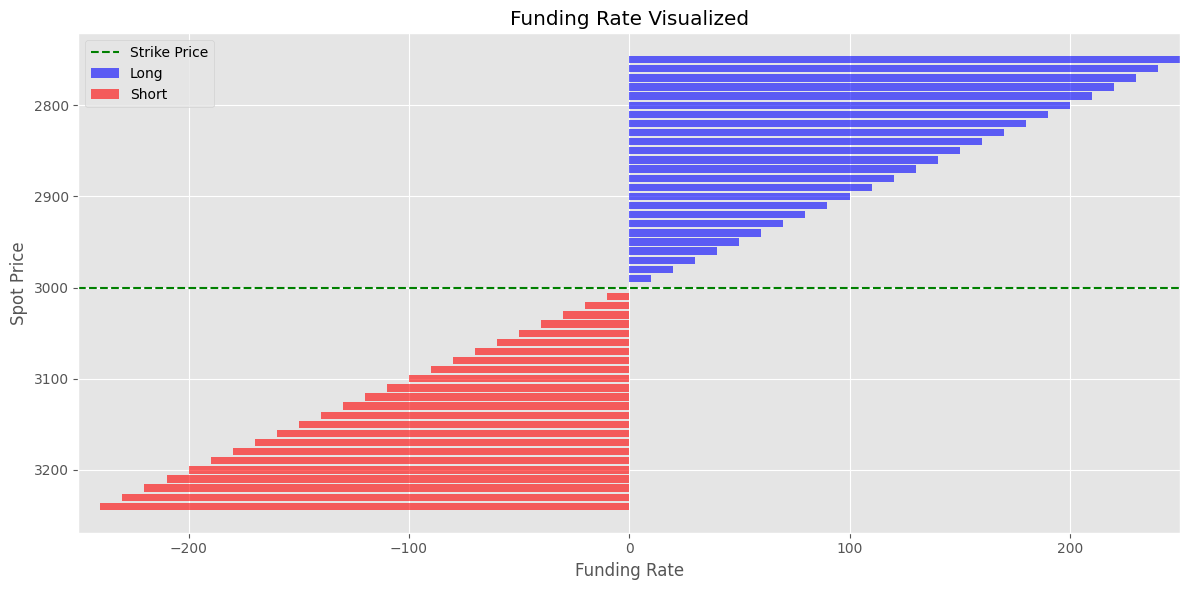

In [4]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot funding rates
ax.barh(spot_strike_funding['spot_price'], spot_strike_funding['funding_rate_long'], 
        height=8, color='blue', alpha=0.6, label='Long')
ax.barh(spot_strike_funding['spot_price'], -spot_strike_funding['funding_rate_short'], 
        height=8, color='red', alpha=0.6, label='Short')

# Set labels and title
ax.set_ylabel('Spot Price')
ax.set_xlabel('Funding Rate')
ax.set_title('Funding Rate Visualized')

# Add a vertical line at the strike price
ax.axhline(y=strike, color='green', linestyle='--', label='Strike Price')

# Adjust the x-axis to be symmetrical
max_rate = max(funding_long.max(), funding_short.max())
ax.set_xlim(-max_rate, max_rate)

# Add legend
ax.legend()

# Invert y-axis to have higher prices at the top
ax.invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()